In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/RAJ BATHANI/Downloads/TimeSeries Datasets/AMGN_close.csv", index_col = ['Date'], parse_dates = ['Date'])

In [3]:
df = df.asfreq('b')
df.Close = df.Close.fillna(method = "ffill")

In [4]:
df.isna().sum()

Close    0
dtype: int64

In [5]:
from statsmodels.tsa.ar_model import AR, ARResults

In [6]:
model = AR(df['Close'])
ARfit = model.fit()
future_forecasted_values = ARfit.predict(start=len(df),end=len(df)+21)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


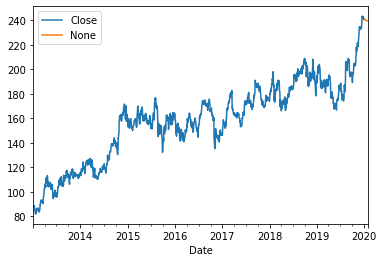

In [8]:
df['Close'].plot(legend=True)
future_forecasted_values.plot(legend=True)

In [9]:
future_forecasted_values

2020-01-01    240.758878
2020-01-02    240.661857
2020-01-03    240.606253
2020-01-06    240.622048
2020-01-07    240.520879
2020-01-08    240.471091
2020-01-09    240.486969
2020-01-10    240.409017
2020-01-13    240.167343
2020-01-14    240.180477
2020-01-15    240.140887
2020-01-16    239.877296
2020-01-17    239.501944
2020-01-20    239.509387
2020-01-21    239.538072
2020-01-22    239.446018
2020-01-23    239.353833
2020-01-24    239.355798
2020-01-27    239.363302
2020-01-28    239.273072
2020-01-29    239.286469
2020-01-30    239.296338
Freq: B, dtype: float64

In [10]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [11]:
len(df)

1825

In [12]:
ARfit.k_ar

25